# Tutorial MongoDB y scikit-learn

## Instalación de bibliotecas pymongo

In [1]:
!pip install pymongo
import pymongo

     |████████████████████████████████| 506 kB 492 kB/s eta 0:00:01


## Conexión, visualización, selección o creación de base de datos

In [9]:
myclient = pymongo.MongoClient("mongodb://192.168.49.189:27017/")
dblist = myclient.list_database_names()
print(dblist)

ServerSelectionTimeoutError: 192.168.49.189:27017: [Errno 111] Connection refused, Timeout: 30s, Topology Description: <TopologyDescription id: 63196d620e63e8c7432648a6, topology_type: Unknown, servers: [<ServerDescription ('192.168.49.189', 27017) server_type: Unknown, rtt: None, error=AutoReconnect('192.168.49.189:27017: [Errno 111] Connection refused')>]>

## Visualización, selección o creación de la colección

In [ ]:
mydb = myclient["datasets_ml"]
print(mydb.list_collection_names())

['iris']


In [ ]:
mycol = mydb["iris"]

## Comandos MongoDB

### Buscar un solo documento (Find One)

In [ ]:
x = mycol.find_one()

print(x)


{'_id': ObjectId('62cbbf6267cbe7f0641b9116'), 'Id': 1, 'SepalLengthCm': 5.1, 'SepalWidthCm': 3.5, 'PetalLengthCm': 1.4, 'PetalWidthCm': 0.2, 'Species': 'Iris-setosa'}


### Buscar varios documentos (Find) y condicionales

In [ ]:
for x in mycol.find().limit(5):
  print(x)

{'_id': ObjectId('62cbbf6267cbe7f0641b9116'), 'Id': 1, 'SepalLengthCm': 5.1, 'SepalWidthCm': 3.5, 'PetalLengthCm': 1.4, 'PetalWidthCm': 0.2, 'Species': 'Iris-setosa'}
{'_id': ObjectId('62cbbf6267cbe7f0641b9117'), 'Id': 2, 'SepalLengthCm': 4.9, 'SepalWidthCm': 3, 'PetalLengthCm': 1.4, 'PetalWidthCm': 0.2, 'Species': 'Iris-setosa'}
{'_id': ObjectId('62cbbf6267cbe7f0641b9118'), 'Id': 3, 'SepalLengthCm': 4.7, 'SepalWidthCm': 3.2, 'PetalLengthCm': 1.3, 'PetalWidthCm': 0.2, 'Species': 'Iris-setosa'}
{'_id': ObjectId('62cbbf6267cbe7f0641b9119'), 'Id': 4, 'SepalLengthCm': 4.6, 'SepalWidthCm': 3.1, 'PetalLengthCm': 1.5, 'PetalWidthCm': 0.2, 'Species': 'Iris-setosa'}
{'_id': ObjectId('62cbbf6267cbe7f0641b911a'), 'Id': 5, 'SepalLengthCm': 5, 'SepalWidthCm': 3.6, 'PetalLengthCm': 1.4, 'PetalWidthCm': 0.2, 'Species': 'Iris-setosa'}


In [ ]:
myquery = { "Species": "Iris-versicolor"}
mydoc = mycol.find(myquery).limit(10)

for x in mydoc:
  print(x)

{'_id': ObjectId('62cbbf6267cbe7f0641b9148'), 'Id': 51, 'SepalLengthCm': 7, 'SepalWidthCm': 3.2, 'PetalLengthCm': 4.7, 'PetalWidthCm': 1.4, 'Species': 'Iris-versicolor'}
{'_id': ObjectId('62cbbf6267cbe7f0641b9149'), 'Id': 52, 'SepalLengthCm': 6.4, 'SepalWidthCm': 3.2, 'PetalLengthCm': 4.5, 'PetalWidthCm': 1.5, 'Species': 'Iris-versicolor'}
{'_id': ObjectId('62cbbf6267cbe7f0641b914a'), 'Id': 53, 'SepalLengthCm': 6.9, 'SepalWidthCm': 3.1, 'PetalLengthCm': 4.9, 'PetalWidthCm': 1.5, 'Species': 'Iris-versicolor'}
{'_id': ObjectId('62cbbf6267cbe7f0641b914b'), 'Id': 54, 'SepalLengthCm': 5.5, 'SepalWidthCm': 2.3, 'PetalLengthCm': 4, 'PetalWidthCm': 1.3, 'Species': 'Iris-versicolor'}
{'_id': ObjectId('62cbbf6267cbe7f0641b914c'), 'Id': 55, 'SepalLengthCm': 6.5, 'SepalWidthCm': 2.8, 'PetalLengthCm': 4.6, 'PetalWidthCm': 1.5, 'Species': 'Iris-versicolor'}
{'_id': ObjectId('62cbbf6267cbe7f0641b914d'), 'Id': 56, 'SepalLengthCm': 5.7, 'SepalWidthCm': 2.8, 'PetalLengthCm': 4.5, 'PetalWidthCm': 1.3, 'S

In [ ]:
myquery = { "SepalLengthCm": { "$lt": 6.0 } }
mydoc = mycol.find(myquery).limit(10)

for x in mydoc:
  print(x)

{'_id': ObjectId('62cbbf6267cbe7f0641b9116'), 'Id': 1, 'SepalLengthCm': 5.1, 'SepalWidthCm': 3.5, 'PetalLengthCm': 1.4, 'PetalWidthCm': 0.2, 'Species': 'Iris-setosa'}
{'_id': ObjectId('62cbbf6267cbe7f0641b9117'), 'Id': 2, 'SepalLengthCm': 4.9, 'SepalWidthCm': 3, 'PetalLengthCm': 1.4, 'PetalWidthCm': 0.2, 'Species': 'Iris-setosa'}
{'_id': ObjectId('62cbbf6267cbe7f0641b9118'), 'Id': 3, 'SepalLengthCm': 4.7, 'SepalWidthCm': 3.2, 'PetalLengthCm': 1.3, 'PetalWidthCm': 0.2, 'Species': 'Iris-setosa'}
{'_id': ObjectId('62cbbf6267cbe7f0641b9119'), 'Id': 4, 'SepalLengthCm': 4.6, 'SepalWidthCm': 3.1, 'PetalLengthCm': 1.5, 'PetalWidthCm': 0.2, 'Species': 'Iris-setosa'}
{'_id': ObjectId('62cbbf6267cbe7f0641b911a'), 'Id': 5, 'SepalLengthCm': 5, 'SepalWidthCm': 3.6, 'PetalLengthCm': 1.4, 'PetalWidthCm': 0.2, 'Species': 'Iris-setosa'}
{'_id': ObjectId('62cbbf6267cbe7f0641b911b'), 'Id': 6, 'SepalLengthCm': 5.4, 'SepalWidthCm': 3.9, 'PetalLengthCm': 1.7, 'PetalWidthCm': 0.4, 'Species': 'Iris-setosa'}
{'

### Insert One

In [ ]:
mydict = { 'Id': 151, 'SepalLengthCm': 5.0, 'SepalWidthCm': 3.2, 'PetalLengthCm': 1.6, 'PetalWidthCm': 0.2, 'Species': 'Iris-setosa' }
x = mycol.insert_one(mydict)
print(x)

In [ ]:
myquery = { "Id": 151}
mydoc = mycol.find(myquery)

for x in mydoc:
  print(x)

{'_id': ObjectId('62cbc5500f0ad31a9f2a63f6'), 'Id': 151, 'SepalLengthCm': 5.0, 'SepalWidthCm': 3.2, 'PetalLengthCm': 1.6, 'PetalWidthCm': 0.2, 'Species': 'Iris-setosa'}


### Update One

In [ ]:
myquery = { "Id": 151}
newvalues = { "$set": { "SepalLengthCm": 5.1 } }
mycol.update_one(myquery, newvalues)
#Imprimir despues de la actualización
myquery = { "Id": 151}
mydoc = mycol.find(myquery)
for x in mydoc:
  print(x)

{'_id': ObjectId('62cbc5500f0ad31a9f2a63f6'), 'Id': 151, 'SepalLengthCm': 5.1, 'SepalWidthCm': 3.2, 'PetalLengthCm': 1.6, 'PetalWidthCm': 0.2, 'Species': 'Iris-setosa'}


### Delete One

In [ ]:
myquery = { "Id": 151}
x = mycol.delete_many(myquery)

print(x.deleted_count, " Documento eliminado.")

1  Documento eliminado.


In [ ]:
myquery = { "Id": 151}
mydoc = mycol.find(myquery)
for x in mydoc:
  print(x)

## MongoDB a DataFrame

In [ ]:
import pandas as pd
cursor = mycol.find()
print(cursor)
print('Type of cursor:',type(cursor))

Type of cursor: <class 'pymongo.cursor.Cursor'>


In [ ]:
list_cur = list(cursor)
print(list_cur[1:5])
df = pd.DataFrame(list_cur)
print('Type of df:',type(df))

[{'_id': ObjectId('62cbbf6267cbe7f0641b9117'), 'Id': 2, 'SepalLengthCm': 4.9, 'SepalWidthCm': 3, 'PetalLengthCm': 1.4, 'PetalWidthCm': 0.2, 'Species': 'Iris-setosa'}, {'_id': ObjectId('62cbbf6267cbe7f0641b9118'), 'Id': 3, 'SepalLengthCm': 4.7, 'SepalWidthCm': 3.2, 'PetalLengthCm': 1.3, 'PetalWidthCm': 0.2, 'Species': 'Iris-setosa'}, {'_id': ObjectId('62cbbf6267cbe7f0641b9119'), 'Id': 4, 'SepalLengthCm': 4.6, 'SepalWidthCm': 3.1, 'PetalLengthCm': 1.5, 'PetalWidthCm': 0.2, 'Species': 'Iris-setosa'}, {'_id': ObjectId('62cbbf6267cbe7f0641b911a'), 'Id': 5, 'SepalLengthCm': 5, 'SepalWidthCm': 3.6, 'PetalLengthCm': 1.4, 'PetalWidthCm': 0.2, 'Species': 'Iris-setosa'}]
Type of df: <class 'pandas.core.frame.DataFrame'>


In [ ]:
df.head(5)

,_id,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,62cbbf6267cbe7f0641b9116,1,5.1,3.5,1.4,0.2,Iris-setosa
1,62cbbf6267cbe7f0641b9117,2,4.9,3.0,1.4,0.2,Iris-setosa
2,62cbbf6267cbe7f0641b9118,3,4.7,3.2,1.3,0.2,Iris-setosa
3,62cbbf6267cbe7f0641b9119,4,4.6,3.1,1.5,0.2,Iris-setosa
4,62cbbf6267cbe7f0641b911a,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df=df.drop(['_id','Id'], axis = 1)

In [ ]:
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Construcción del conjunto de datos separando variables independientes y la variable dependiente

In [ ]:
# con esto tomamos todas las variables excepto 'class' como variables independiente
X = df.drop(['Species'], axis = 1)  
# con esto tomamos solo a la variable 'class' como variable dependiente
y = df['Species']
# llamamos a la biblioteca que divide nuestros datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=50)

## Creación de un modelo de clasificación utilizando un árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

## Visualización del árbol de decisión

In [ ]:
!pip install matplotlib
from sklearn import tree
from matplotlib import pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 7.2/7.2 MB 20.0 MB/s eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 23.3 MB/s eta 0:00:00
     ------------------------------------- 944.1/944.1 kB 58.4 MB/s eta 0:00:00
     ---------------------------------------- 55.4/55.4 kB 2.8 MB/s eta 0:00:00


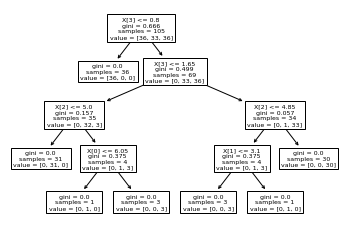

In [ ]:
tree.plot_tree(clf)
plt.show()

## Evaluación del modelo

In [ ]:
predicciones_modelo = clf.predict(X_test) # con esto aplicamos el modelo a los datos de prueba 

In [ ]:
from sklearn.metrics import (confusion_matrix, 
                           accuracy_score)
from sklearn.metrics import ConfusionMatrixDisplay
  
# confusion matrix
cm = confusion_matrix(y_test, predicciones_modelo) 
print ("Confusion Matrix : \n", cm)


# Exactitud de modelo
print('Test accuracy = ', accuracy_score(y_test,predicciones_modelo))

Confusion Matrix : 
 [[14  0  0]
 [ 0 16  1]
 [ 0  1 13]]
Test accuracy =  0.9555555555555556
